## MNIST Handwritten Digit Recognition Problem with Keras 
#### Image size (32*32)
#### Data size (60,000  Train) and (10,000 Test)

In [1]:
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras.datasets import reuters
from keras import models
from keras import layers
from keras.datasets import mnist

from keras import backend as K
K.set_image_dim_ordering('th')

import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

from keras.models import model_from_json



Using TensorFlow backend.


## CNN Arch

In [2]:
# load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)

(60000, 28, 28)


In [3]:
#Resize to 32*32
x_train_new = []
x_test_new = []

# Train
for i in range (x_train.shape[0]):
    x_train_new.append(cv2.resize((x_train[i]),(32,32)))

x_train_new = np.array(x_train_new)


# Test
for i in range (x_test.shape[0]):
    x_test_new.append(cv2.resize((x_test[i]),(32,32)))

x_test_new = np.array(x_test_new)



print(x_train_new.shape)

(60000, 32, 32)


In [4]:
#convert to binary
x_train_new = x_train_new > (130)
x_train_new = 1 - x_train_new

x_test_new = x_test_new > (130)
x_test_new = 1 - x_test_new

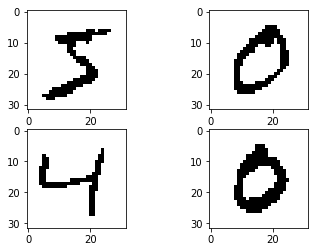

In [5]:
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(x_train_new[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(x_train_new[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(x_train_new[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(x_test_new[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [6]:

# reshape to be [samples][pixels][width][height]
X_train = x_train_new.reshape(x_train_new.shape[0], 32, 32,1).astype('float32')
X_test = x_test_new.reshape(x_test_new.shape[0],32, 32,1).astype('float32')


# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

print(X_train.shape)

(60000, 32, 32, 1)


In [7]:
# define the larger model
def cnn_model():
    # create model
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape=(32, 32,1), activation='relu',data_format="channels_last"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [8]:
# build the model
model = cnn_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, batch_size=200)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 84s 1ms/step - loss: 0.5527 - acc: 0.8284 - val_loss: 0.1752 - val_acc: 0.9490
Epoch 2/15
60000/60000 [==============================] - 82s 1ms/step - loss: 0.1860 - acc: 0.9428 - val_loss: 0.1123 - val_acc: 0.9657
Epoch 3/15
60000/60000 [==============================] - 82s 1ms/step - loss: 0.1303 - acc: 0.9593 - val_loss: 0.0976 - val_acc: 0.9698
Epoch 4/15
60000/60000 [==============================] - 82s 1ms/step - loss: 0.1119 - acc: 0.9651 - val_loss: 0.0750 - val_acc: 0.9757
Epoch 5/15
60000/60000 [==============================] - 81s 1ms/step - loss: 0.0932 - acc: 0.9710 - val_loss: 0.0792 - val_acc: 0.9750
Epoch 6/15
60000/60000 [======

In [13]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 81s 1ms/step - loss: 0.0369 - acc: 0.9881 - val_loss: 0.0483 - val_acc: 0.9854
Epoch 2/10
60000/60000 [==============================] - 82s 1ms/step - loss: 0.0352 - acc: 0.9885 - val_loss: 0.0478 - val_acc: 0.9860
Epoch 3/10
60000/60000 [==============================] - 82s 1ms/step - loss: 0.0322 - acc: 0.9895 - val_loss: 0.0479 - val_acc: 0.9855
Epoch 4/10
60000/60000 [==============================] - 81s 1ms/step - loss: 0.0311 - acc: 0.9895 - val_loss: 0.0429 - val_acc: 0.9863
Epoch 5/10
60000/60000 [==============================] - 81s 1ms/step - loss: 0.0312 - acc: 0.9899 - val_loss: 0.0491 - val_acc: 0.9858
Epoch 6/10
60000/60000 [==============================] - 82s 1ms/step - loss: 0.0291 - acc: 0.9902 - val_loss: 0.0506 - val_acc: 0.9849
Epoch 7/10
60000/60000 [==============================] - 82s 1ms/step - loss: 0.0257 - acc: 0.9911 - val_loss: 0.0483 - val_acc

[0]


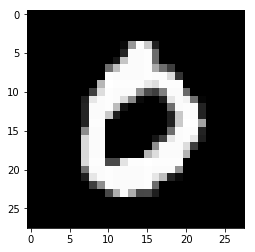

In [14]:
index = 3 # of the sample to be tested
y = model.predict_classes(X_test[index:index+1])
plt.imshow(x_test[index], cmap=plt.get_cmap('gray'))
print(y)

## Save the model weights

In [16]:
model.save('new_digits_model.h5')

## Start running cells from here 

In [82]:
 
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


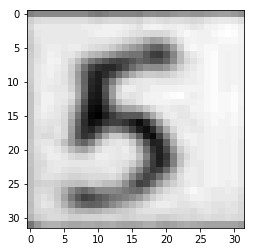

In [83]:
img = cv2.imread('11.png',1)

# Convert to Gray
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# resize image
img = cv2.resize(img, (32,32), interpolation = cv2.INTER_AREA)

plt.imshow(img, cmap=plt.get_cmap('gray'))


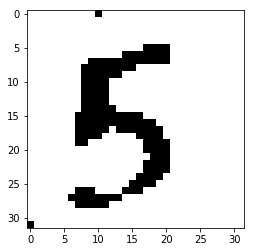

In [84]:
# This part to convert background to black only
new_img = img > (130)
plt.imshow(new_img, cmap=plt.get_cmap('gray'))

In [85]:
img = new_img.reshape(1, 32, 32,1).astype('float32')
y = model.predict_classes(img)
print(y)

[5]
